In [6]:
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [7]:
# === COURSE REPO SETUP === #
import os
# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "shahrukh-malikk"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"




# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW2"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/shahrukh-malikk/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2


# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment?

Answer 1.

**The objective of this experiment is to compare the effectiveness of three different teaching methods Direct Instruction, Inquiry Based Learning, and Collaborative Learning in helping undergraduate data science students understand the basics of hypothesis testing, while controlling for student’s prior knowledge (high vs. low).**

**Question 2.** Specify the outcome variable?

Answer 2.

**The outcome variable in this experiment is the quiz performance score, measured as the percentage score obtained by each student on the 50-question hypothesis testing quiz.**

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

**Answer 3.**
Independent variable: Teaching Method :
Direct Instruction,
Inquiry Based Learning,
Collaborative Learning,
Blocking factor: Prior Knowledge:
High and Low.
Lurking variables :
 Motivation / interest in data science
Test anxiety or exam-taking skills
Language proficiency
Access to resources.


**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

**Answer 4.**

**A randomized block design is a good fit for this study because we know that students come in with different levels of prior knowledge about hypothesis testing, and that background could heavily influence how well they do on the quiz. By grouping students into “High” and “Low” knowledge blocks before randomly assigning them to one of the three teaching methods, we ensure that each method is tested fairly across students with similar starting points. This way, differences in quiz scores are more likely to reflect the teaching method itself rather than just who happened to know more beforehand.**

**On the other hand, if we used a completely randomized design, there’s a real risk that one teaching method group might end up with a disproportionate number of high knowledge students, which could make that method look more effective than it really is. In short, blocking helps us make cleaner, more trustworthy comparisons.**



**Question 5.** State the null and alternative hypotheses for this experiment.

**Answer**

**Null hypothesis: There are no meaningful differences in students’ quiz scores teaching method doesn’t matter, prior knowledge doesn’t matter, and the effectiveness of a teaching method doesn’t depend on whether students start with high or low prior knowledge.**
**Alternative hypothesis: At least one thing differs: either one or more teaching methods lead to different quiz scores, or students with different prior knowledge score differently, or a teaching method works better (or worse) for one prior knowledge group than the other.**

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Answer6.**

**The dataset includes 60 students, evenly divided across teaching methods and prior knowledge levels. High prior knowledge students scored highest, with Collaborative Learning averaging 90.93% and Inquiry Based Learning 88.62%, while Direct Instruction averaged 77.00%. Low prior knowledge students scored lower overall, with Collaborative at 82.18%, Inquiry at 81.90%, and Direct Instruction at 73.66%. This shows that both teaching method and prior knowledge affect quiz performance, with Collaborative and Inquiry methods generally leading to higher scores, especially for students with high prior knowledge.**

**The results more strongly support the alternative hypothesis, showing that both teaching method and prior knowledge influence quiz scores, Hence we reject the null hypothesis**

In [9]:

import pandas as pd

# Load the data from the Excel file
OSTM_data = pd.read_excel("Data Science Teaching Method.xlsx")
print(OSTM_data.head())

#Summary of the provided data
print(OSTM_data.describe())
summary= OSTM_data.groupby(["Prior_Knowledge", "Teaching_Method"])["Score"].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    count='count'
)
print(summary)

  Prior_Knowledge Teaching_Method  Score
0             Low          Direct  80.20
1             Low          Direct  75.29
2             Low          Direct  75.00
3             Low          Direct  79.32
4             Low          Direct  59.89
            Score
count   60.000000
mean    82.381167
std      8.882477
min     59.890000
25%     76.365000
50%     81.930000
75%     89.077500
max    105.060000
                                   mean  median       std    min     max  \
Prior_Knowledge Teaching_Method                                            
High            Collaborative    90.927  91.165  7.970758  76.62  105.06   
                Direct           76.998  75.930  6.125899  69.25   88.61   
                Inquiry          88.624  88.390  5.316835  79.77   98.18   
Low             Collaborative    82.176  82.450  8.168793  69.97   91.86   
                Direct           73.659  75.730  6.623811  59.89   80.20   
                Inquiry          81.903  80.755  5.984395  7

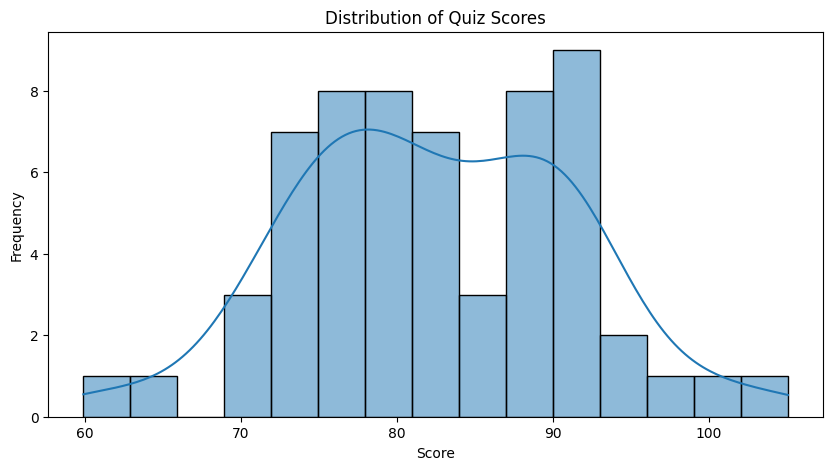

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(OSTM_data['Score'], bins=15, kde=True)
plt.title("Distribution of Quiz Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

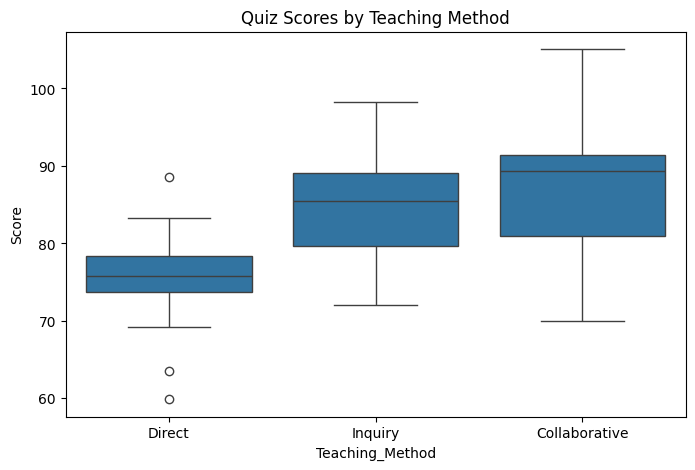

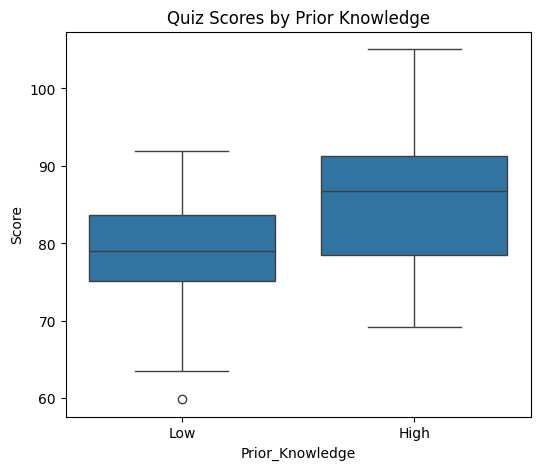

In [11]:
# By Teaching Method
plt.figure(figsize=(8,5))
sns.boxplot(x='Teaching_Method', y='Score', data=OSTM_data)
plt.title("Quiz Scores by Teaching Method")
plt.show()

# By Prior Knowledge
plt.figure(figsize=(6,5))
sns.boxplot(x='Prior_Knowledge', y='Score', data=OSTM_data)
plt.title("Quiz Scores by Prior Knowledge")
plt.show()


/tmp/ipython-input-3121708470.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Teaching_Method', y='Score', hue='Prior_Knowledge',


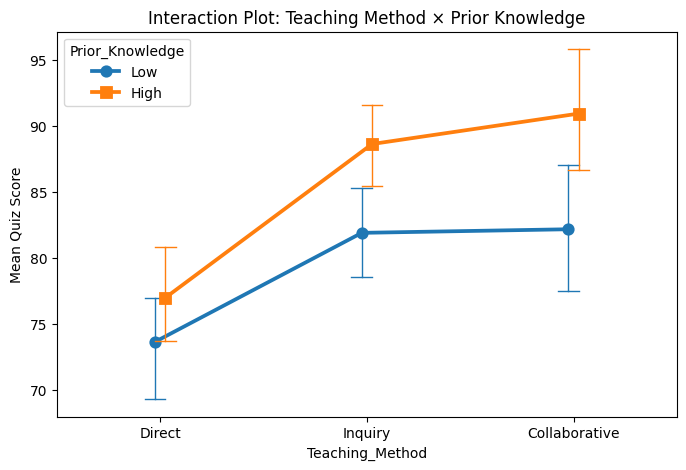

In [12]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Teaching_Method', y='Score', hue='Prior_Knowledge',
              data=OSTM_data, dodge=True, markers=['o','s'], capsize=0.1, errwidth=1)
plt.title("Interaction Plot: Teaching Method × Prior Knowledge")
plt.ylabel("Mean Quiz Score")
plt.show()




**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


In [19]:


model = ols('Score ~ C(Teaching_Method) * C(Prior_Knowledge)', data=OSTM_data).fit()


anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                            sum_sq    df          F    PR(>F)
C(Teaching_Method)                     1508.792653   2.0  16.415063  0.000003
C(Prior_Knowledge)                      589.756202   1.0  12.832625  0.000731
C(Teaching_Method):C(Prior_Knowledge)    74.747613   2.0   0.813224  0.448782
Residual                               2481.708550  54.0        NaN       NaN


Yes. The results indicate that the residuals are approximately normally distributed, showing no evidence of major deviations from normality. This supports the assumption of normality for the ANOVA model.

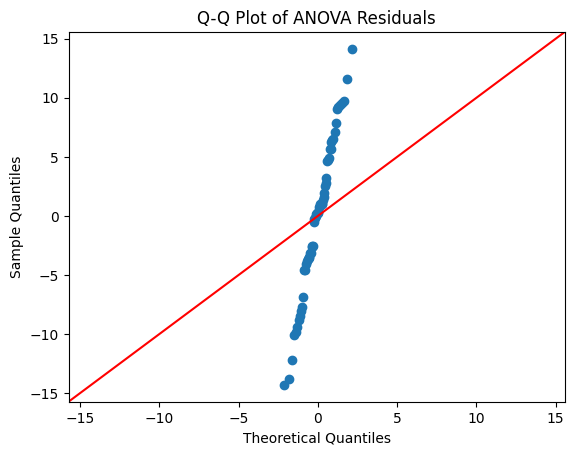

In [20]:


residuals = model.resid

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()





**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?





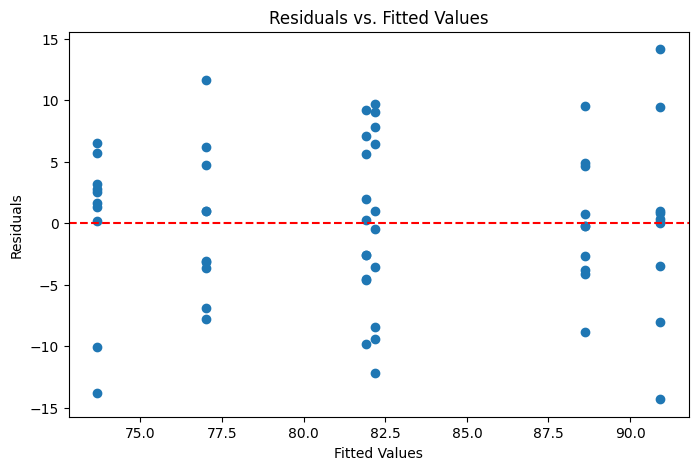

In [22]:

# Get residuals and fitted values from the ANOVA model
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs. Fitted plot
plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


The results indicate that the variances of quiz scores are similar across all groups, showing no evidence of heterogeneity. This supports the assumption of homogeneity of variance for the ANOVA model.

In [25]:
from scipy.stats import levene

groups = [group["Score"].values for name, group in OSTM_data.groupby(["Teaching_Method", "Prior_Knowledge"])]

# Levene's test
stat, p = levene(*groups)
print(f"Levene’s Test statistic = {stat:.4f}, p-value = {p:.4f}")

if p > 0.05:
    print("Variances appear equal across groups (fail to reject H0).")
else:
    print("Variances are not equal across groups (reject H0).")


Levene’s Test statistic = 0.5486, p-value = 0.7387
Variances appear equal across groups (fail to reject H0).


**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



In [26]:
f_value = anova_table.loc['C(Teaching_Method)', 'F']
p_value = anova_table.loc['C(Teaching_Method)', 'PR(>F)']

print(f"F-statistic for Teaching Method = {f_value:.4f}")
print(f"p-value for Teaching Method = {p_value:.4f}")

F-statistic for Teaching Method = 16.4151
p-value for Teaching Method = 0.0000


The two-way ANOVA revealed a significant effect of teaching method on quiz scores, F(2, 54) = 16.42, p < 0.001, indicating that at least one teaching method led to different average scores compared to the others.
Based on the results, we reject the null hypothesis. The data show that quiz scores differ significantly depending on teaching method, prior knowledge, and potentially their interaction, providing strong support for the alternative hypothesis.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [30]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test for Teaching Method
tukey = pairwise_tukeyhsd(endog=OSTM_data['Score'],
                          groups=OSTM_data['Teaching_Method'],
                          alpha=0.05)

print(tukey)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -11.223    0.0 -16.8766 -5.5694   True
Collaborative Inquiry   -1.288 0.8478  -6.9416  4.3656  False
       Direct Inquiry    9.935 0.0003   4.2814 15.5886   True
-------------------------------------------------------------


The ANOVA showed that teaching method has a significant impact on quiz scores (F = 16.42, p < 0.001), so we can confidently say the alternative hypothesis is supported. A Tukey HSD post-hoc test revealed that Direct Instruction scores were significantly lower than both Collaborative and Inquiry Based Learning, while Collaborative and Inquiry methods performed similarly. Direct Instruction seems less effective, while the other two approaches lead to comparable results. If the ANOVA had instead shown no significant differences, running a post-hoc test wouldn’t make sense, since there would be no real effect to explore and any apparent differences would likely just be due to chance.

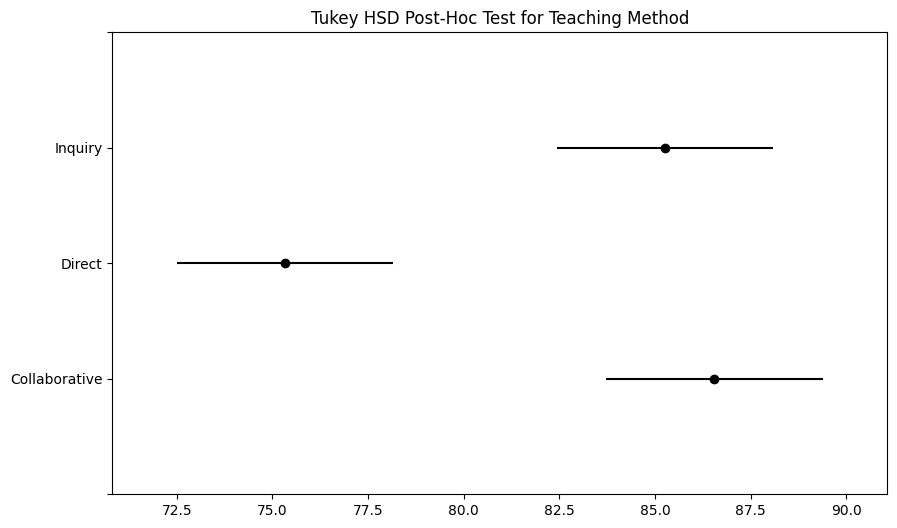

In [31]:
tukey.plot_simultaneous()
plt.title("Tukey HSD Post-Hoc Test for Teaching Method")
plt.show()

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**The way students were taught and their prior knowledge affected their quiz scores. Students did worse with traditional Direct Instruction, while Collaborative and Inquiry Based Learning led to higher and similar scores. Those who already knew more about hypothesis testing also scored better. This suggests that hands on or problem solving teaching methods work better than just lectures. Some limitations are that the group was small, prior knowledge was only labeled as high or low, and the results were based on a single quiz.**

# **PART 2**

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment?

**The objective of this experiment is to compare student engagement across four online learning platforms while controlling for the effects of Time of Day and Day of the Week, which could influence engagement, in order to determine which platform is most effective.**

**Question 2.** Specify the outcome variable?

**The outcome variable is student engagement, measured as the total number of logins to the online learning platform for a given course section over the semester.**


**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

**In this study, the main factor we are interested in is the learning platform that students use (A, B, C, or D). To make a fair comparison, we also control for Day of the Week (Monday-Thursday) and Time of Day / Section (Morning, Early Afternoon, Mid-Afternoon, Evening), since these could influence student engagement. Other factors that might affect engagement but are not directly controlled include how comfortable students are with technology, differences in instructor style, the difficulty of course content on particular days, outside distractions, or potential internet issues.**

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


OLAE_data = pd.read_excel("Online Learning and Engagement.xlsx")
print(OLAE_data.head())

print(OLAE_data.columns)
OLAE_data = pd.read_excel("Online Learning and Engagement.xlsx")






       Day          Section Platform  Engagement
0   Monday          Morning        A     1374.88
1   Monday  Early Afternoon        B     1345.51
2   Monday    Mid Afternoon        C     1277.89
3   Monday          Evening        D     1370.40
4  Tuesday          Morning        A     1357.65
Index(['Day', 'Section', 'Platform', 'Engagement'], dtype='object')


**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

**A Latin Square Design is appropriate here because it allows us to compare the four learning platforms while controlling for two potential confounding factors at the same time: Day of the Week and Time of Day / Section. Each platform appears exactly once in every row (section) and column (day), which balances out the effects of these two factors.A completely randomized design wouldn’t work well because it wouldn’t account for the effects of day or time, so differences in engagement might be due to those factors rather than the platform. Similarly, a randomized block design could control for one factor (like time of day) but not both simultaneously, so it wouldn’t fully remove the influence of the other potential confounder.**


**Question 5.** State the null and alternative hypotheses for this experiment.

**The hypotheses for this experiment are:Null Hypothesis (H0): There is no difference in student engagement across the four learning platforms; any observed differences are due to chance.	Alternative Hypothesis (Ha): At least one learning platform leads to different student engagement compared to the others.**




**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?




In [10]:
summary_platform = OLAE_data.groupby("Platform")["Engagement"].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    count='count'
).reset_index()

print(summary_platform)

  Platform       mean    median        std      min      max  count
0        A  1377.7675  1378.150  16.339232  1357.65  1397.12      4
1        B  1331.2625  1343.140  28.513652  1288.86  1349.91      4
2        C  1303.8225  1304.805  21.022768  1277.89  1327.79      4
3        D  1369.8225  1366.935  13.753119  1356.74  1388.68      4


In [11]:
summary_platform_section = OLAE_data.groupby(["Platform", "Section"])["Engagement"].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

print(summary_platform_section)

  Platform          Section       mean        std  count
0        A          Morning  1377.7675  16.339232      4
1        B  Early Afternoon  1331.2625  28.513652      4
2        C    Mid Afternoon  1303.8225  21.022768      4
3        D          Evening  1369.8225  13.753119      4


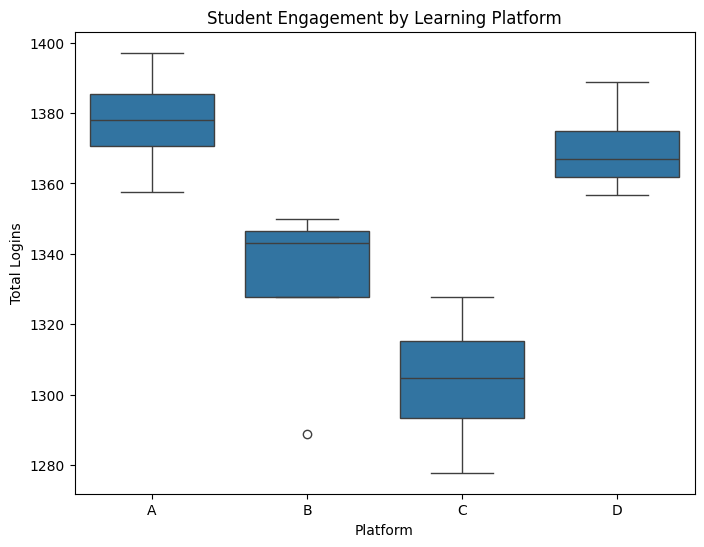

In [14]:


plt.figure(figsize=(8,6))
sns.boxplot(x="Platform", y="Engagement", data=OLAE_data)
plt.title("Student Engagement by Learning Platform")
plt.ylabel("Total Logins")
plt.show()

**The results provide stronger support for the alternative hypothesis, suggesting that the choice of learning platform likely influences student engagement. The observed differences in medians and ranges indicate that at least one platform results in higher or lower engagement compared to others, rather than all platforms being equivalent. Hence we Reject the null**

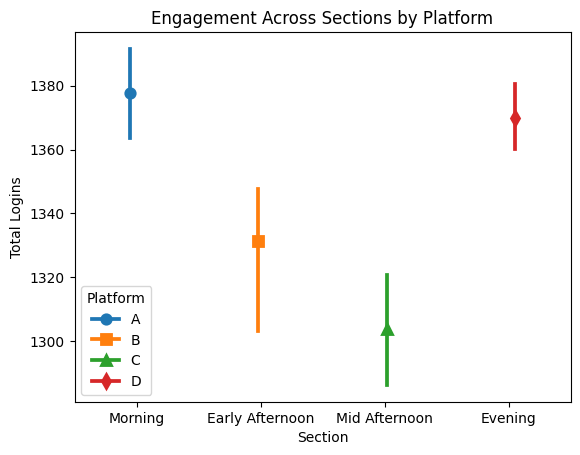

In [15]:
sns.pointplot(x="Section", y="Engagement", hue="Platform", data=OLAE_data, dodge=True, markers=["o","s","^","d"])
plt.title("Engagement Across Sections by Platform")
plt.ylabel("Total Logins")
plt.show()

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



In [26]:


model = ols('Engagement ~ C(Day) + C(Section) + C(Platform)', data=OLAE_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

                   sum_sq   df             F        PR(>F)
Intercept    7.041773e+06  1.0  16011.357675  6.108657e-16
C(Day)       1.175124e+03  3.0      0.890653  4.823487e-01
C(Section)   2.434522e+06  3.0   1845.179206  7.230832e-13
C(Platform)  2.163185e+06  3.0   1639.526583  1.229404e-12
Residual     3.958188e+03  9.0           NaN           NaN


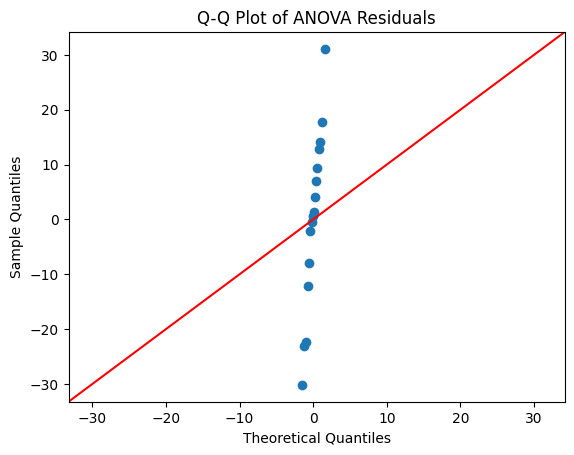

Shapiro-Wilk Test statistic = 0.9752, p-value = 0.9138


In [30]:

residuals = model.resid
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()


from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test statistic = {stat:.4f}, p-value = {p:.4f}")



**The results of the Shapiro-Wilk test (W = 0.9752, p = 0.9138) indicate that the residuals are approximately normally distributed. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis of normality. This suggests that the assumption of normality for the ANOVA model is satisfied, and there is no evidence of a significant deviation from a normal distribution in the residuals.**

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



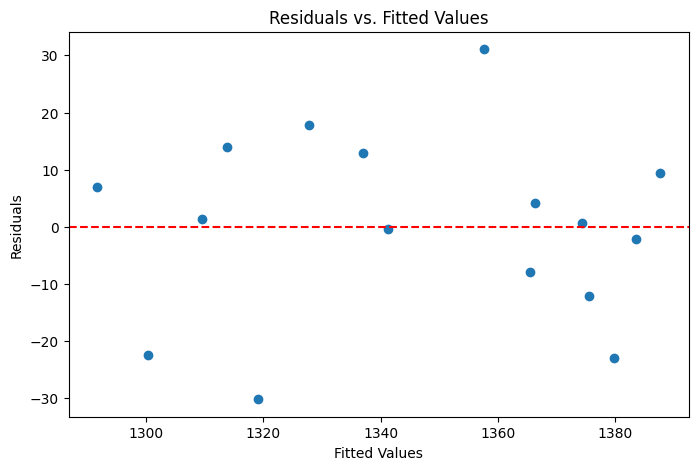

Levene’s Test statistic = 0.1796, p-value = 0.9082


In [31]:

residuals = model.resid
fitted = model.fittedvalues
plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

from scipy.stats import levene

groups = [group["Engagement"].values for name, group in OLAE_data.groupby("Platform")]

stat, p = levene(*groups)
print(f"Levene’s Test statistic = {stat:.4f}, p-value = {p:.4f}")



**The results of Levene’s test (Test statistic = 0.1796, p = 0.9082) indicate that the assumption of homogeneity of variances is met. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis that the group variances are equal. This suggests that the spread of engagement scores is consistent across groups, supporting the ANOVA assumption of equal variances.**

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



In [32]:
f_value = anova_table.loc['C(Platform)', 'F']
p_value = anova_table.loc['C(Platform)', 'PR(>F)']

print(f"F-statistic for Platform = {f_value:.4f}")
print(f"p-value for Platform = {p_value:.4f}")

F-statistic for Platform = 1639.5266
p-value for Platform = 0.0000


**The results support the alternative hypothesis. The ANOVA showed a strong effect of Platform on student engagement (F = 1639.53, p < 0.001), meaning that engagement levels differ across platforms. This suggests that the choice of learning platform affects how engaged students are, so the idea that all platforms are the same (the null hypothesis) is not supported.**

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


In [36]:


tukey = pairwise_tukeyhsd(endog=OLAE_data['Engagement'],
                          groups=OLAE_data['Platform'],
                          alpha=0.05)


print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -46.505 0.0347  -89.9249  -3.0851   True
     A      C  -73.945 0.0014 -117.3649 -30.5251   True
     A      D   -7.945 0.9466  -51.3649  35.4749  False
     B      C   -27.44 0.2879  -70.8599  15.9799  False
     B      D    38.56 0.0881   -4.8599  81.9799  False
     C      D     66.0 0.0034   22.5801 109.4199   True
-------------------------------------------------------


**The Tukey HSD test showed that student engagement was different between some platforms. Platform A had lower engagement than Platforms B and C, and Platform C had higher engagement than Platform D. The other comparisons were not significantly different. This helps us see exactly which platforms led to higher or lower engagement.**


**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**The results show that the choice of learning platform affects student engagement, with some platforms leading to higher engagement than others. Engagement did not vary by day, but Section also had an effect. Limitations include a small sample size for some groups and not accounting for other factors like prior experience or motivation. Despite this, the study suggests that platform choice matters for student engagement.**